In [5]:
import pandas as pd

In [6]:
# Load the data
train_ride_df = pd.read_csv('./DBtrainrides_final_result.csv')

In [7]:
train_ride_df.head()

,ID_Base,ID_Timestamp,stop_number,IBNR,long,lat,arrival_plan,departure_plan,arrival_delay_m,transformed_info_message,prev_arrival_delay_m,prev_departure_delay_m,weighted_avg_prev_delay,max_station_number,station_progress
0,-1001326572688500578,2407082041,2,8011118.0,13.375988,52.509379,2024-07-08 20:44:00,2024-07-08 20:45:00,0.0,No message,0.0,0.0,0.000000,7,0.285714
1,-1001326572688500578,2407082041,3,8011160.0,9.095851,48.849792,NaN,NaN,NaN,No message,0.0,0.0,0.000000,7,0.428571
2,-1001326572688500578,2407082041,4,8011167.0,13.299437,52.530276,2024-07-08 20:55:00,2024-07-08 20:56:00,0.0,No message,0.0,0.0,0.000000,7,0.571429
3,-1001326572688500578,2407082041,5,8010404.0,13.196898,52.534648,2024-07-08 21:00:00,2024-07-08 21:03:00,2.0,No message,0.0,0.0,0.000000,7,0.714286
4,-1001326572688500578,2407082041,6,8080040.0,13.128917,52.549396,2024-07-08 21:06:00,2024-07-08 21:07:00,1.0,No message,2.0,0.0,0.666667,7,0.857143


In [8]:
train_ride_df.count()

ID_Base                     2430251
ID_Timestamp                2430251
stop_number                 2430251
IBNR                        2309163
long                        2430251
lat                         2430251
arrival_plan                1598621
departure_plan              1598621
arrival_delay_m             1598621
transformed_info_message    2430251
prev_arrival_delay_m        2430251
prev_departure_delay_m      2430251
weighted_avg_prev_delay     2430251
max_station_number          2430251
station_progress            2430251
dtype: int64

In [9]:
train_ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430251 entries, 0 to 2430250
Data columns (total 15 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID_Base                   int64  
 1   ID_Timestamp              int64  
 2   stop_number               int64  
 3   IBNR                      float64
 4   long                      float64
 5   lat                       float64
 6   arrival_plan              object 
 7   departure_plan            object 
 8   arrival_delay_m           float64
 9   transformed_info_message  object 
 10  prev_arrival_delay_m      float64
 11  prev_departure_delay_m    float64
 12  weighted_avg_prev_delay   float64
 13  max_station_number        int64  
 14  station_progress          float64
dtypes: float64(8), int64(4), object(3)
memory usage: 278.1+ MB


In [10]:
# Define column groups
id_columns = ['ID_Base', 'ID_Timestamp', 'stop_number', 'IBNR']  # Removed 'starting_station_IBNR' and 'zip' as they are not present in the DataFrame
float_columns = [
    'long', 'lat', 'arrival_delay_m', 'prev_arrival_delay_m', 
    'prev_departure_delay_m', 'weighted_avg_prev_delay', 'station_progress'
]  # Removed 'cumulative_delay', 'delay_gain', etc., as they are not present
datetime_columns = ['arrival_plan', 'departure_plan']  # 'arrival_time' and 'departure_time' are missing
categorical_columns = [
    'transformed_info_message'  # Removed 'clear_station_name', 'origin_departure_plan', etc., as they are missing
]

# Identify columns that are present in the dataframe
existing_id_columns = [col for col in id_columns if col in train_ride_df.columns]
existing_float_columns = [col for col in float_columns if col in train_ride_df.columns]
existing_datetime_columns = [col for col in datetime_columns if col in train_ride_df.columns]
existing_categorical_columns = [col for col in categorical_columns if col in train_ride_df.columns]

# Convert columns to appropriate data types based on logical assumptions

# Convert ID columns and station-related columns to object (not int64)
train_ride_df[existing_id_columns] = train_ride_df[existing_id_columns].astype('object')

# Convert geospatial and delay-related columns to float64
train_ride_df[existing_float_columns] = train_ride_df[existing_float_columns].astype('float64')

# Convert datetime columns to datetime type
train_ride_df[existing_datetime_columns] = train_ride_df[existing_datetime_columns].apply(pd.to_datetime)

# Convert categorical columns to object type
train_ride_df[existing_categorical_columns] = train_ride_df[existing_categorical_columns].astype('object')

# Check the data types after conversion
train_ride_df.dtypes

ID_Base                             object
ID_Timestamp                        object
stop_number                         object
IBNR                                object
long                               float64
lat                                float64
arrival_plan                datetime64[ns]
departure_plan              datetime64[ns]
arrival_delay_m                    float64
transformed_info_message            object
prev_arrival_delay_m               float64
prev_departure_delay_m             float64
weighted_avg_prev_delay            float64
max_station_number                   int64
station_progress                   float64
dtype: object

In [11]:
# Identify relevant numeric columns (those of type float64 and int64)
numeric_columns = train_ride_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['long', 'lat', 'arrival_delay_m', 'prev_arrival_delay_m',
       'prev_departure_delay_m', 'weighted_avg_prev_delay',
       'max_station_number', 'station_progress'],
      dtype='object')

In [12]:
# Identify relevant numeric columns (those of type float64 and int64)
numeric_columns = train_ride_df.select_dtypes(include=['float64', 'int64']).columns

# Count NaN values in each numeric column
nan_counts = train_ride_df[numeric_columns].isna().sum()

# Display the count of NaN values for each numeric column
nan_counts

long                            0
lat                             0
arrival_delay_m            831630
prev_arrival_delay_m            0
prev_departure_delay_m          0
weighted_avg_prev_delay         0
max_station_number              0
station_progress                0
dtype: int64

long: 2430251 non-NaN values
lat: 2430251 non-NaN values
arrival_delay_m: 1598621 non-NaN values
prev_arrival_delay_m: 2430251 non-NaN values
prev_departure_delay_m: 2430251 non-NaN values
weighted_avg_prev_delay: 2430251 non-NaN values
max_station_number: 2430251 non-NaN values
station_progress: 2430251 non-NaN values


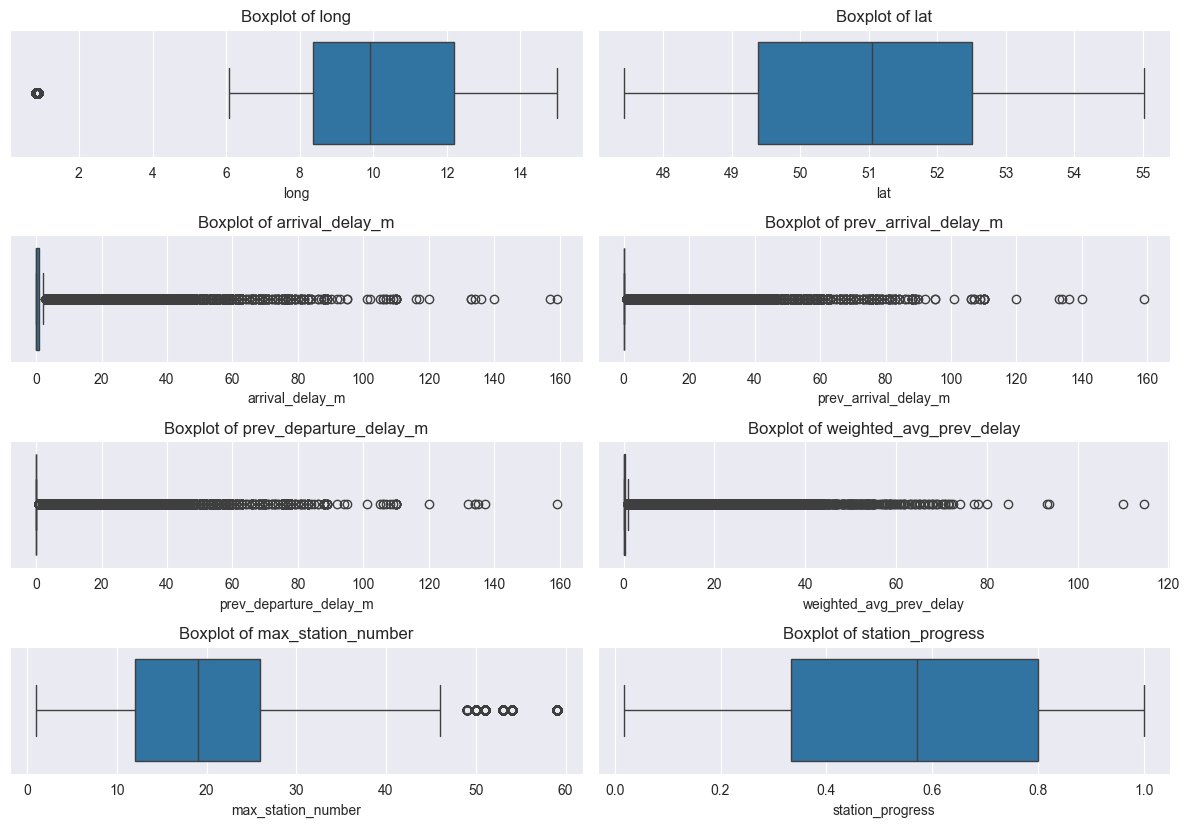

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify relevant numeric columns (those of type float64 and int64)
numeric_columns = train_ride_df.select_dtypes(include=['float64', 'int64']).columns

# Print the number of non-NaN values for each column
for col in numeric_columns:
    print(f'{col}: {train_ride_df[col].notna().sum()} non-NaN values')

# Create boxplots for each numeric column
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//2 + 1, 2, i)
    sns.boxplot(x=train_ride_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [16]:
from ydata_profiling import ProfileReport

# Assuming you have a pandas dataframe called train_ride_df
profile = ProfileReport(train_ride_df, title="Train Ride Data Report", explorative=True)

# To save the report as an HTML file
profile.to_file("train_ride_report.html")

ValidationError: 1 validation error for Settings
infer_types
  extra fields not permitted (type=value_error.extra)

In [15]:
train_ride_df.head()

,ID_Base,ID_Timestamp,stop_number,IBNR,long,lat,arrival_plan,departure_plan,arrival_delay_m,transformed_info_message,prev_arrival_delay_m,prev_departure_delay_m,weighted_avg_prev_delay,max_station_number,station_progress
0,-1001326572688500578,2407082041,2,8011118.0,13.375988,52.509379,2024-07-08 20:44:00,2024-07-08 20:45:00,0.0,No message,0.0,0.0,0.000000,7,0.285714
1,-1001326572688500578,2407082041,3,8011160.0,9.095851,48.849792,NaT,NaT,NaN,No message,0.0,0.0,0.000000,7,0.428571
2,-1001326572688500578,2407082041,4,8011167.0,13.299437,52.530276,2024-07-08 20:55:00,2024-07-08 20:56:00,0.0,No message,0.0,0.0,0.000000,7,0.571429
3,-1001326572688500578,2407082041,5,8010404.0,13.196898,52.534648,2024-07-08 21:00:00,2024-07-08 21:03:00,2.0,No message,0.0,0.0,0.000000,7,0.714286
4,-1001326572688500578,2407082041,6,8080040.0,13.128917,52.549396,2024-07-08 21:06:00,2024-07-08 21:07:00,1.0,No message,2.0,0.0,0.666667,7,0.857143


In [20]:
import dtale

# Start the D-Tale interface
d = dtale.show(train_ride_df)
d.open_browser()